In [67]:
#Importing tensorflow 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
#Importing MNIST Dataset

mnist = tf.keras.datasets.mnist  # 28x28 images of handwritten digits from 0-9
(x_train,y_train), (x_test,y_test) = mnist.load_data() #seperating the training and testing data

In [69]:
print(x_train.shape)

(60000, 28, 28)


In [70]:
print ("Initial shape & Dimension of x_train:", str(x_train.shape))
print ("Number of samples in our training data:", str(len(x_train)))
print ("Number of lables in our training data:", str(len(x_test)))

Initial shape & Dimension of x_train: (60000, 28, 28)
Number of samples in our training data: 60000
Number of lables in our training data: 10000


In [71]:
print("Number of samples in test data:"+ str(len(x_test)))
print("Number of labels in the test data:"+str(len(y_test)))

Number of samples in test data:10000
Number of labels in the test data:10000


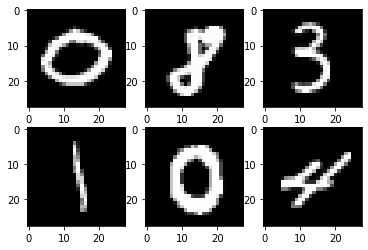

In [72]:
#Checking images using openCV

import cv2
import numpy as np
for i in range(0,6):
 random_num = np.random.randint(0, len(x_train))
 img = x_train[random_num]
 window_name = 'Random Sample #' +str(i)
 plt.subplot(2,3,i+1);plt.imshow(img,cmap='gray')

# Note : A new window will open you can see the images and press tab for multiple times 

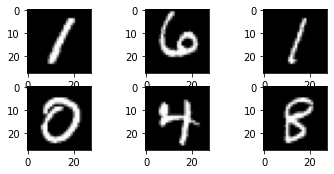

In [73]:

plt.subplot(334)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.subplot(335)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.subplot(336)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.subplot(337)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.subplot(338)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.subplot(339)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.show()

In [74]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]
m_train = x_train.shape[0]
m_test = x_test.shape[0]
x_train = x_train.reshape(m_train, img_rows, img_cols, 1)
x_test = x_test.reshape(m_test, img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [75]:
x_train /=255
x_test /=255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [76]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print ("Number of classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

y_train[0]

Number of classes: 10


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [77]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [78]:
# Training the models 

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(10, kernel_size=(3,3), activation = 'relu', input_shape = input_shape))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [79]:
# Compiling the model 
model.compile(loss ="categorical_crossentropy", optimizer= keras.optimizers.Adam(0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False), metrics = ['accuracy'])

In [80]:
#Training the model
model.fit(x_train,y_train,epochs = 5)


Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2067 - accuracy: 0.9369
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0884 - accuracy: 0.9739
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0642 - accuracy: 0.9804
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0531 - accuracy: 0.9834
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0452 - accuracy: 0.9858


In [81]:
batch_size = 32
epochs = 6

history = model.fit(x_train,
                    y_train,
                    batch_size= batch_size,
                    epochs = epochs,
                    verbose=1, 
                    validation_data= (x_test, y_test))



score = model.evaluate(x_test, y_test, verbose=0)
print('Test_loss:', score[0])
print('Test_accuracy:', score[1])

Epoch 1/6
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0401 - accuracy: 0.9872 - val_loss: 0.0290 - val_accuracy: 0.9906
Epoch 2/6
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0338 - accuracy: 0.9894 - val_loss: 0.0301 - val_accuracy: 0.9910
Epoch 3/6
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0319 - accuracy: 0.9900 - val_loss: 0.0285 - val_accuracy: 0.9908
Epoch 4/6
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0289 - accuracy: 0.9909 - val_loss: 0.0302 - val_accuracy: 0.9917
Epoch 5/6
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0243 - accuracy: 0.9925 - val_loss: 0.0289 - val_accuracy: 0.9915
Epoch 6/6
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0247 - accuracy: 0.9924 - val_loss: 0.0273 - val_accuracy: 0.9932
Test_loss: 0.027328558266162872
Test_accuracy: 0.9932000041007996


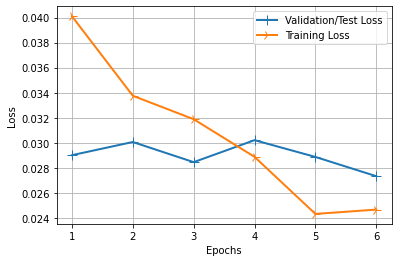

In [82]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label= 'Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

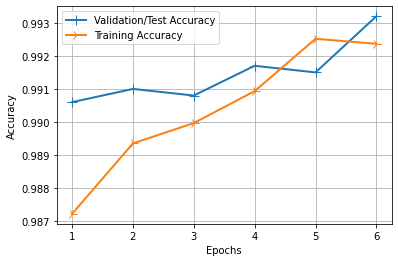

In [83]:
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label= 'Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [85]:
y_pred=model.predict(x_test)
y_pred_=np.argmax(y_pred, axis=1)
y_test_=np.argmax(y_test, axis=1)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_, y_pred_)
confusion_matrix

array([[ 977,    0,    0,    0,    0,    0,    2,    1,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    0, 1024,    0,    1,    0,    1,    5,    0,    0],
       [   0,    0,    0, 1007,    0,    2,    0,    0,    1,    0],
       [   0,    0,    0,    0,  971,    0,    2,    0,    2,    7],
       [   0,    0,    0,    4,    0,  885,    2,    0,    0,    1],
       [   4,    3,    0,    1,    1,    1,  947,    0,    1,    0],
       [   0,    2,    3,    1,    0,    0,    0, 1019,    1,    2],
       [   2,    0,    2,    0,    0,    0,    0,    0,  969,    1],
       [   1,    1,    0,    0,    4,    2,    0,    1,    2,  998]],
      dtype=int64)

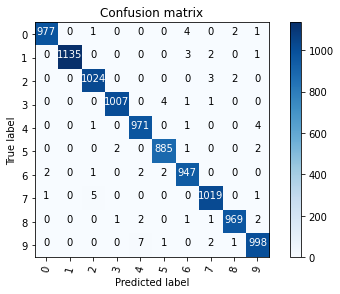

In [87]:
# Confussion matrix 
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75) 
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = range(10)
cm = confusion_matrix(y_pred_,y_test_)

plt.figure(2)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [88]:
from sklearn.metrics import classification_report
predictions = model.predict_classes(x_test)
print(classification_report(y_test_,predictions))

c:\users\sudar\.conda\envs\tf_gpu\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

